In [2]:
from scipy.stats import norm, rv_continuous
import matplotlib.pyplot as plt
import numpy
from scipy import optimize
import warnings
warnings.filterwarnings("ignore")
from sympy import oo, Symbol, integrate, lambdify
from sympy.stats import Uniform, Normal, density
x = Symbol("x")
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('useless', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))
def convolve_mult(n=2):
    unf = density(Uniform(x, 0, 1))(x)
    yield lambdify(x, unf)
    n -= 2
    ft = convolve(unf, unf, x)
    yield lambdify(x, ft)
    for _ in range(n):
        ft = convolve(ft, unf, x)
        yield lambdify(x, ft)
f1x = density(Normal(x, 0, 1))(x)
f2x = density(Uniform(x, 0, 1))(x)
fxt = convolve(f1x, f2x, x)
fx = lambdify(x, fxt)
class cstm_func(rv_continuous):
    def _pdf(self, x):
        return fx(x)

Мода 0.5000000000000004
Медиана 0.5000000000000002


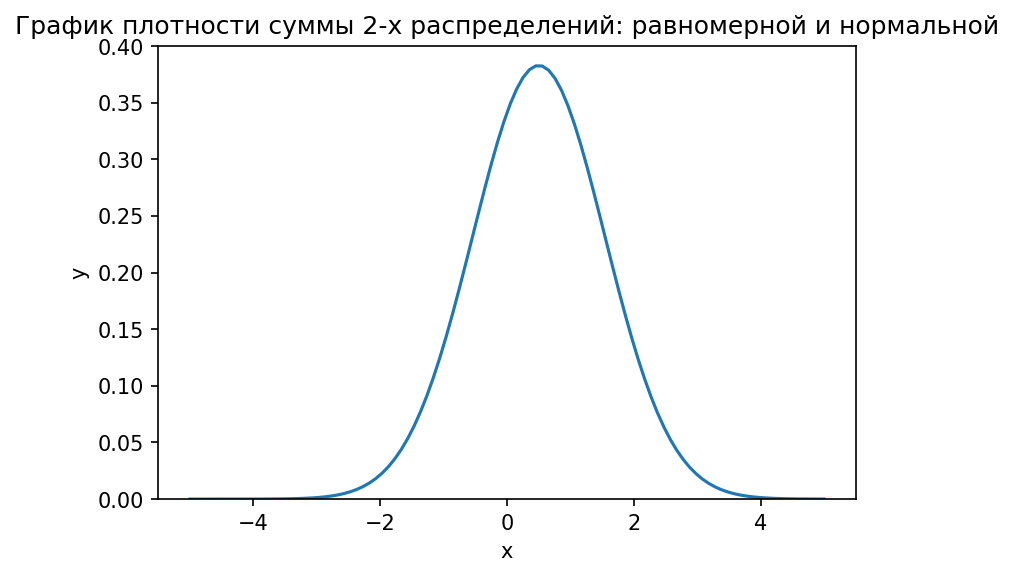

In [3]:
print("Мода", optimize.fmin(lambda x: -fx(x), 0, disp=False)[0])
print("Медиана", cstm_func().ppf(0.5))
fig, ax = plt.subplots()
fig.set_dpi(150)
xi = numpy.linspace(-5, 5, 100)
ax.plot(xi, list(map(fx, xi)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(0, 0.4)
ax.set_title('График плотности суммы 2-х распределений: равномерной и нормальной')
None

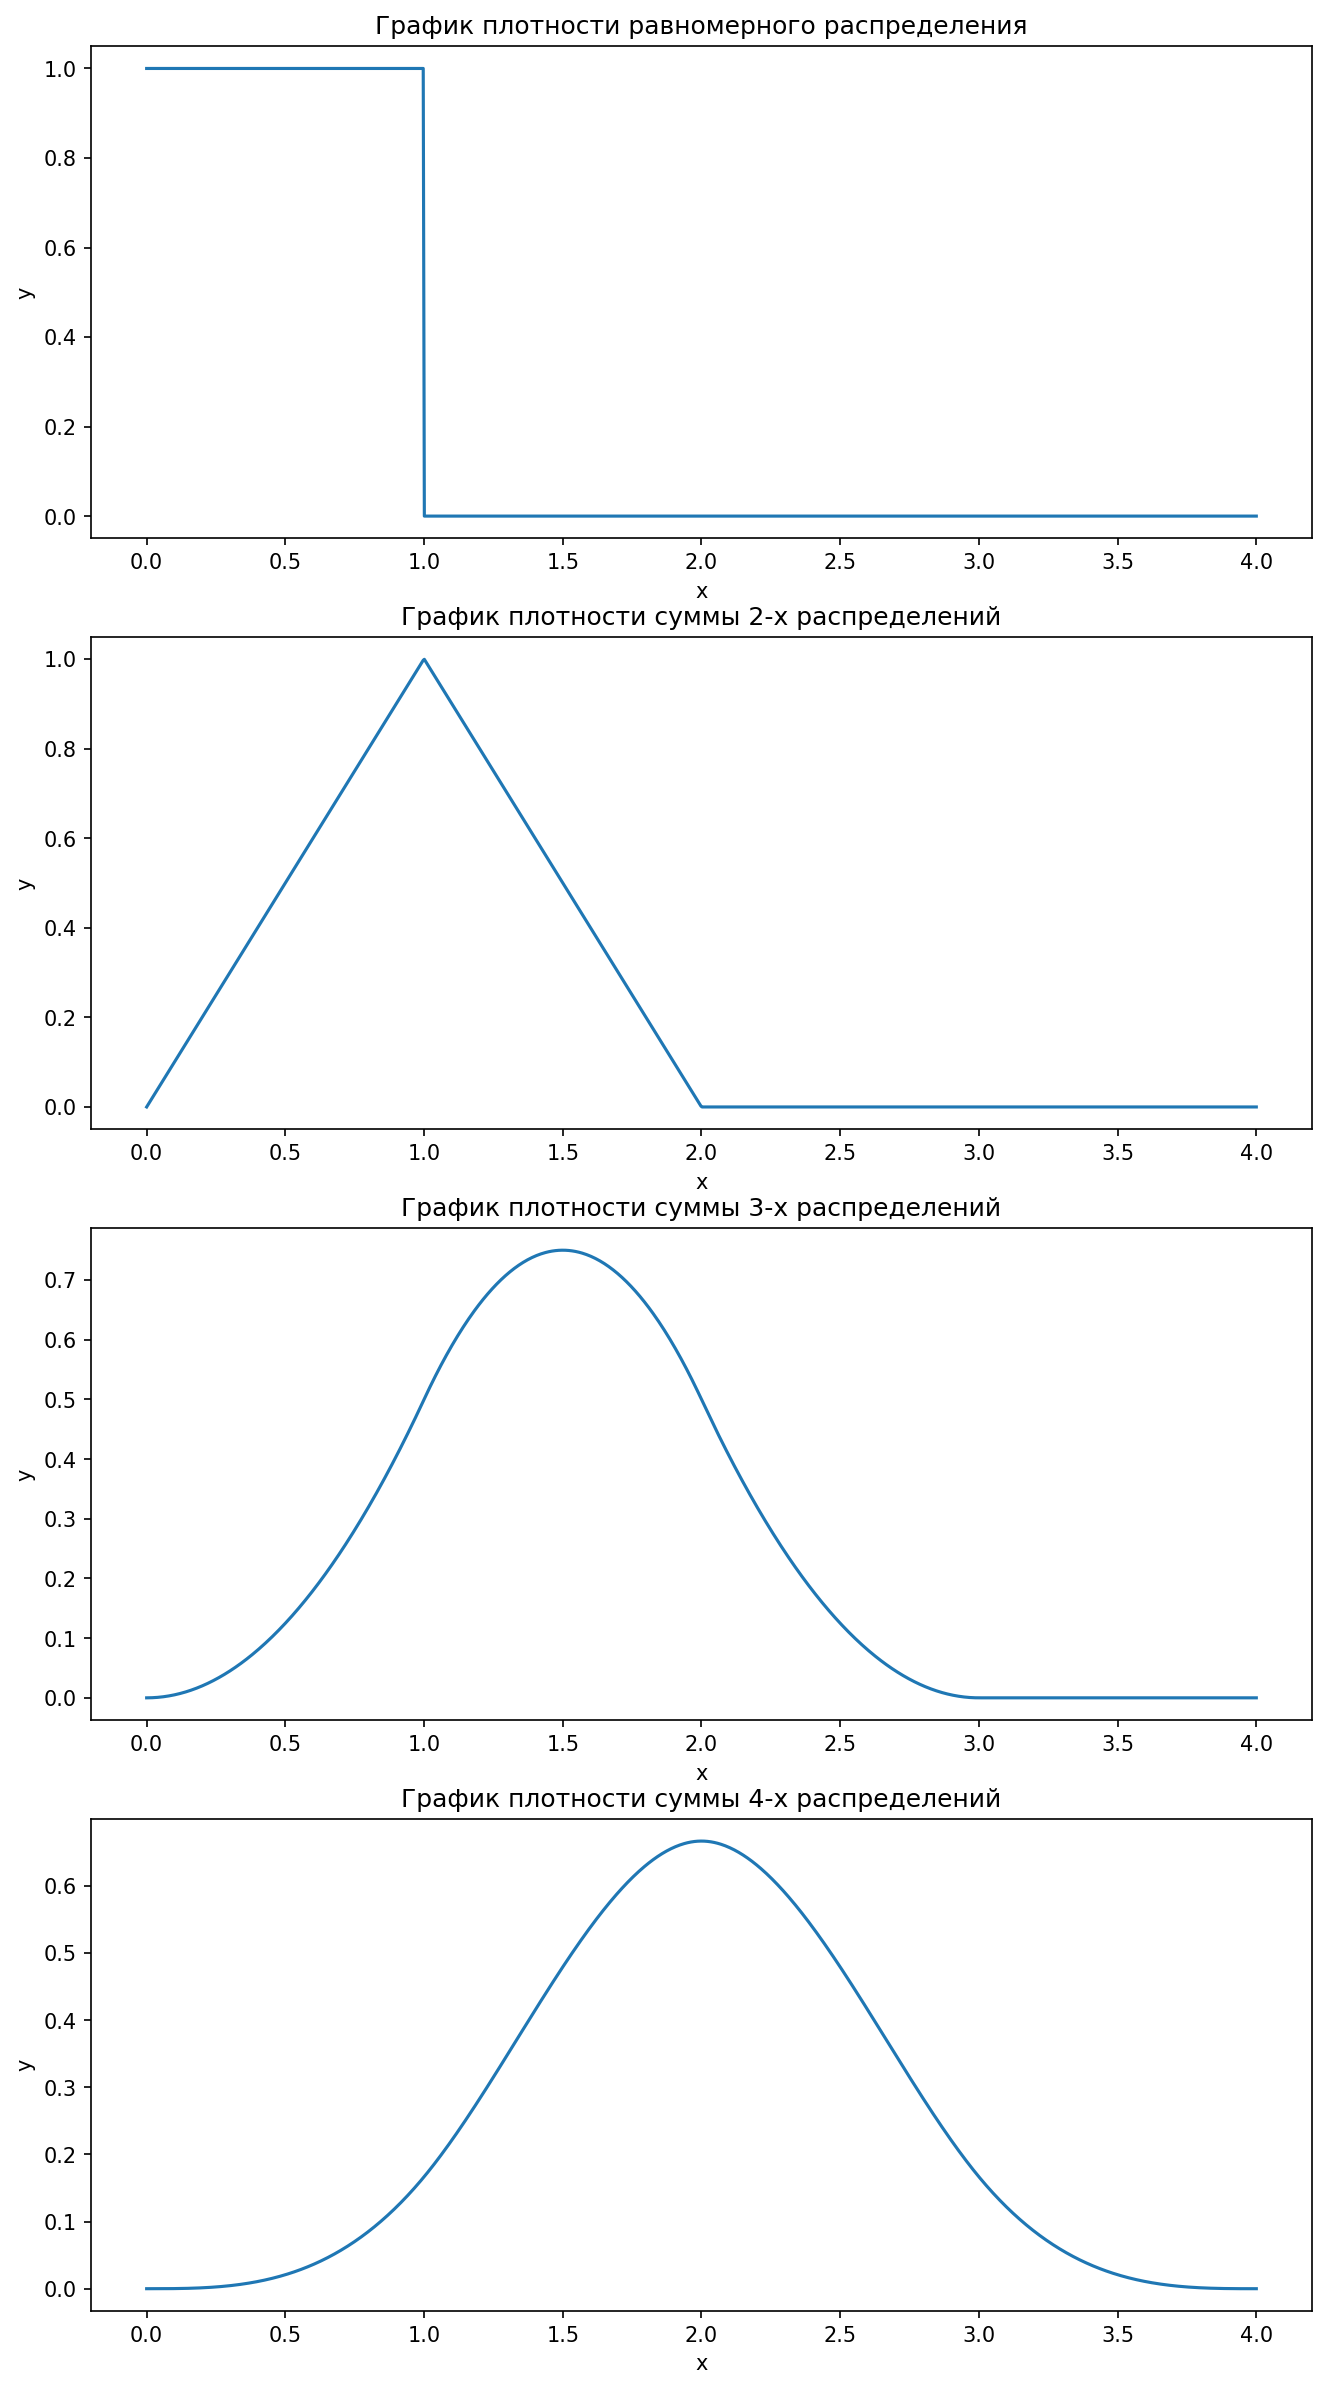

In [4]:
lst_f = list(convolve_mult(4))
lst_titles = ["График плотности равномерного распределения", "График плотности суммы 2-х распределений", "График плотности суммы 3-х распределений", "График плотности суммы 4-х распределений"]
import matplotlib.pyplot as plt
import numpy
fig, axs = plt.subplots(4)
fig.set_dpi(150)
fig.set_size_inches(10.5, 20, forward=True)
xi = numpy.linspace(0, 4, 1000)
for f, title, ax in zip(lst_f, lst_titles, axs):
    ax.plot(xi, list(map(lambda x: f(x), xi)))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)